# U.S. Medical Insurance Costs

# Goals
The main goal of this project is to create a python script that will analyse a data set in a way to gain a meaningful insight into the data.

# Data
The data set being analysed is a set of data points relating to the health insurance of various users from around the USA.

As far as the developer's aware, this data was gathered ethically.

The data set contains 7 categories:
- age; Age of the user
- sex; Sex of the user
- bmi; Measure of body mass that can be used to gauge a variety of possible health conditions
- children; Number of children included in the users plan
- smoker; Has the user reported that they are a smoker?
- region; Regional location of the user
- charges; Annual cost of the insurance plan


# Analysis
Due to the nature of the data set, the obvious paths of inquiry would relate to the "charges" data point.
As this data set is related to the cost of various users health insurance, a clear analysis would be to investigate the relationship between each of the various factors of a user to their insurance cost. e.g.
- users location and it's relationship to cost
- age and it's relationship to cost
- bmi and it's relationship to cost

While a main factor can be analysed, the additional factors can't be ignored in this analysis.
The data points must be categorised and subcategorised as much as possible while still allowing for a meaningful comparison.

With this taken into account, the following data comparisons were chosen:
1. age to region
   1. Region age averages
      1. How they compare to each other
      2. How they compare to the nation average
   2. Average cost per age bracket per region
2. smoking to bmi (TBD)
   1. percentage smokers per BMI bracket
      1. regional comparison
   2. comparison of costs per BMI range between smokers and non-smokers
      1. regional comparison
3. age to children (TBD)
   1. per region analysis

In [11]:
# Importing necessary libraries
import csv
import math
import matplotlib.pyplot as plt

# Initializing empty lists for each column in the CSV file
age = []
sex = []
bmi = []
children = []
smoker = []
region = []
charges = []

def parse_column_to_list(lst, file, column):
    """Function to parse a specific column from a CSV file into a list

    Args:
        lst (_type_): _description_
        file (_type_): _description_
        column (_type_): _description_

    Returns:
        _type_: _description_
    """
    with open(file, 'r') as csvFile:
        dataSet = csv.DictReader(csvFile)
        for row in dataSet:
            lst.append(row[column])
    return lst

def parse_file(file):
    """Function to parse all columns from a CSV file

    Args:
        file (_type_): _description_
    """
    columns = []
    with open(file, 'r') as csvFile:
        dataSet = csv.DictReader(csvFile)
        columns = dataSet.fieldnames
    for column in columns:
        parse_column_to_list(globals()[column], file, column)

def string_average(input_list):
    """Function to calculate the most common string value and unique string values in a list

    Args:
        input_list (list[str]): The list of strings to be checked

    Returns:
        max_strings: _description_
        unique_strings: _description_
    """
    string_count = {}
    for string in input_list:
        if string in string_count:
            string_count[string] += 1
        else:
            string_count[string] = 1
    max_count = max(string_count.values())
    max_strings = [string for string, count in string_count.items() if count == max_count]
    unique_strings = list(string_count.keys())
    return max_strings, unique_strings

# Parsing the CSV file
parse_file('insurance.csv')

In [12]:
class RegionRecords:
    """Class to store and analyze records based on region"""

    def __init__(self, region):
        """
        Initializes a new instance of the RegionRecords class.

        Parameters:
        - region (str): The region associated with the records.
        """
        self.region = region
        self.parsedData = {"age": -1, "sex": "None", "bmi": -1, "children": -1, "smoker": "None", "charges": -1, "sex totals": {}, "population": 0}

        self.ageDictionary = {}
        self.sexDictionary = {}
        self.bmiDictionary = {}
        self.childrenDictionary = {}
        self.smokerDictionary = {}
        self.chargesDictionary = {}
        self.patientDictionary = {}
        self.ageInterval = 5.0
        self.ageBrackets = {}
        self.analysedData = {}

    def add_item_and_parse(self, id, age, sex, bmi, children, smoker, charges):
        """
        Adds a record and parses the data.

        Parameters:
        - id (int): The identifier of the record.
        - age (int): The age of the patient.
        - sex (str): The sex of the patient.
        - bmi (float): The BMI of the patient.
        - children (int): The number of children the patient has.
        - smoker (str): Indicates if the patient smokes or not.
        - charges (float): The medical charges of the patient.
        """
        self.add_item(id, age, sex, bmi, children, smoker, charges)
        self.parse_data()

    def add_item(self, id, age, sex, bmi, children, smoker, charges):
        """
        Adds a record to the dictionaries.

        Parameters:
        - id (int): The identifier of the record.
        - age (int): The age of the patient.
        - sex (str): The sex of the patient.
        - bmi (float): The BMI of the patient.
        - children (int): The number of children the patient has.
        - smoker (str): Indicates if the patient smokes or not.
        - charges (float): The medical charges of the patient.
        """
        self.ageDictionary[id] = age
        self.sexDictionary[id] = sex
        self.bmiDictionary[id] = bmi
        self.childrenDictionary[id] = children
        self.smokerDictionary[id] = smoker
        self.chargesDictionary[id] = charges
        self.patientDictionary[id] = {"age": age, "sex": sex, "bmi": bmi, "children": children, "smoker": smoker, "charges": charges}

    def parse_data(self):
        """
        Parses the data and calculates statistics.
        """
        self.parsedData["population"] = len(self.ageDictionary)

        self.parsedData["age"] = round(sum(self.ageDictionary.values()) / len(self.ageDictionary), 1)

        # Calculating the most common and unique sex values
        sex_max, sex_ids = string_average(list(self.sexDictionary.values()))
        if len(sex_max) > 1:
            sex_max[0] = "equal"
        self.parsedData["sex"] = sex_max[0]
        for sex in sex_ids:
            self.parsedData["sex totals"][sex] = list(self.sexDictionary.values()).count(sex)

        self.parsedData["bmi"] = round(sum(self.bmiDictionary.values()) / len(self.bmiDictionary), 1)

        self.parsedData["children"] = round(sum(self.childrenDictionary.values()) / len(self.childrenDictionary), 1)

        # Calculating the most common smoker value
        smoker_max, __ = string_average(list(self.smokerDictionary.values()))
        if len(smoker_max) > 1:
            smoker_max[0] = "equal"
        self.parsedData["smoker"] = smoker_max[0]

        self.parsedData["charges"] = round(sum(self.chargesDictionary.values()) / len(self.chargesDictionary), 2)

        # Grouping patients into age brackets
        for i in list(self.ageDictionary.keys()):
            age_bracket = int(math.ceil(self.ageDictionary[i]/ self.ageInterval) * self.ageInterval)
            if age_bracket not in self.ageBrackets:
                self.ageBrackets[age_bracket] = []
            self.ageBrackets[age_bracket].append(self.patientDictionary[i])

    def analyse_ages(self):
        """
        Analyses the age statistics.
        """
        self.analysedData["age"] = {}
        if "values" not in self.analysedData["age"]:
            self.analysedData["age"]["values"] = []

        self.analysedData["age"]["values"].append("Average Age (" + self.region + ")")
        self.analysedData["age"]["Average Age (" + self.region + ")"] = self.parsedData["age"]

        # Finding the age bracket with the largest number of patients
        bracketMax = ""
        bracketMaxLen = 0
        for bracket in self.ageBrackets:
            if len(self.ageBrackets[bracket]) > bracketMaxLen:
                bracketMaxLen = len(self.ageBrackets[bracket])
                bracketMax = bracket

        self.analysedData["age"]["values"].append("Largest bracket (" + self.region + ")")
        self.analysedData["age"]["Largest bracket (" + self.region + ")"] = bracketMax

        # Analyse costs per age bracket
        self.analysedData["age"]["values"].append("Bracket averages (" + self.region + ")")
        self.analysedData["age"]["Bracket averages (" + self.region + ")"] = {}
        bracketAverage = 0
        bracketSum = 0
        bracketMaxCost = 0
        for bracket in sorted(self.ageBrackets.keys()):
            for patient in self.ageBrackets[bracket]:
                bracketSum += patient["charges"]
            bracketAverage = round(bracketSum / len(self.ageBrackets[bracket]), 2)
            if bracketAverage > bracketMaxCost:
                bracketMaxCost = bracketAverage
                bracketMax = bracket
            self.analysedData["age"]["Bracket averages (" + self.region + ")"][bracket] = bracketAverage

        self.analysedData["age"]["values"].append("Most Expensive bracket (" + self.region + ")")
        self.analysedData["age"]["Most Expensive bracket (" + self.region + ")"] = {}
        self.analysedData["age"]["Most Expensive bracket (" + self.region + ")"][bracketMax] = bracketMaxCost

    def get_analyses(self):
        """
        Retrieves the analysed data.

        Returns:
        - dict: The analysed data.
        """
        self.analyse_ages()
        returnAnalysedData = self.analysedData.copy()
        return returnAnalysedData

    def get_parse_data(self):
        """
        Retrieves the parsed data.

        Returns:
        - tuple: A tuple containing the region and the parsed data.
        """
        returnParsedData = self.parsedData.copy()
        return self.region, returnParsedData


In [13]:
class PatientRecords(RegionRecords):
    """Class to store and analyze patient records"""

    def __init__ (self, patient_age, patient_sex, patient_bmi, patient_children, patient_smoker, patient_region, patient_charges):
        """
        Initializes a new instance of the PatientRecords class.

        Parameters:
        - patient_age (list): The ages of the patients.
        - patient_sex (list): The sexes of the patients.
        - patient_bmi (list): The BMIs of the patients.
        - patient_children (list): The number of children for each patient.
        - patient_smoker (list): Indicates if each patient smokes or not.
        - patient_region (list): The regions associated with each patient.
        - patient_charges (list): The medical charges for each patient.
        """
        super().__init__("national")

        self.parsedData["region"] = "None"
        self.parsedData["regions"] = []
        self.parsedData["region totals"] = {}

        self.regionDictionary = {}

        self.regions = {}

        self.patient_age = [eval(i) for i in patient_age]
        self.patient_sex = patient_sex
        self.patient_bmi = [eval(i) for i in patient_bmi]
        self.patient_children = [eval(i) for i in patient_children]
        self.patient_smoker = patient_smoker
        self.patient_region = patient_region
        self.patient_charges = [eval(i) for i in patient_charges]

        self.parse_nationals()

    def add_item(self, id, age, sex, bmi, children, smoker, region, charges):
        """
        Adds a record to the dictionaries and tracks regions.

        Parameters:
        - id (int): The identifier of the record.
        - age (int): The age of the patient.
        - sex (str): The sex of the patient.
        - bmi (float): The BMI of the patient.
        - children (int): The number of children the patient has.
        - smoker (str): Indicates if the patient smokes or not.
        - region (str): The region associated with the record.
        - charges (float): The medical charges of the patient.
        """
        self.regionDictionary[id] = region
        super().add_item(id, age, sex, bmi, children, smoker, charges)
        if region not in self.regions:
            self.regions[region] = RegionRecords(region)
        self.regions[region].add_item_and_parse(id, age, sex, bmi, children, smoker, charges)

    def parse_nationals(self):
        """
        Parses the national data and calculates statistics.
        """
        for i in range(len(self.patient_age)):
            self.add_item(
                i,
                self.patient_age[i],
                self.patient_sex[i],
                self.patient_bmi[i],
                self.patient_children[i],
                self.patient_smoker[i],
                self.patient_region[i],
                self.patient_charges[i]
            )

        super().parse_data()

        # Calculating the most common region value
        region_max, region_values = string_average(self.patient_region)
        if len(region_max) > 1:
            self.parsedData["region"] = region_max
        else:
            self.parsedData["region"] = region_max[0]
        self.parsedData["regions"] = region_values

        # Getting parsed data for each region
        for region in self.regions:
            self.parsedData["region totals"][region] = self.regions[region].get_parse_data()

    def analyse_ages_national(self):
        """
        Analyzes the age statistics for the national data.
        """
        self.analyse_ages()

        analysesTemp = {}
        all_age_values = []  # Create a new list to store age values for all regions
        for region in self.regions:
            analysesTemp = self.regions[region].get_analyses()["age"]
            for value in analysesTemp["values"]:
                all_age_values.append(value)
            for key in analysesTemp:
                if key != "value":
                    self.analysedData["age"][key] = analysesTemp[key]

        self.analysedData["age"]["values"] = all_age_values  # Update the values with the combined list

    def get_analyses_national(self):
        """
        Retrieves the analyzed data for the national data.

        Returns:
        - dict: The analyzed data for the national data.
        """
        self.analyse_ages_national()
        returnAnalysedData = self.analysedData.copy()
        return returnAnalysedData

    def get_nationals(self):
        """
        Retrieves the parsed data for the national data.

        Returns:
        - dict: The parsed data for the national data.
        """
        returnNationals = self.parsedData.copy()
        return returnNationals

    def get_regions(self):
        """
        Retrieves the parsed data for each region.

        Returns:
        - dict: A dictionary containing the parsed data for each region.
        """
        returnRegions = {}
        for region in self.regions:
            returnRegions[region] = self.regions[region].get_parse_data()
        return returnRegions


# Analysis
With the classes and functions created, and with the data imported. 
The next step is to analyse the data, the 'PatientRecords' class has a couple of methods that can help with this.
The first of which is 'get_national', this returns a dictionary that contains;
- The national averages of the datapoints from the dataset.
- The population of each sex
- The total population
- The regions included in the nation
- And, the region specific versions of the first 3 of the previously mentioned data

The second of which is 'get_analyses_national', this returns a dictionary containing the results of the various analyses methods.
Currently, this includes the following (abridged);
- A list of the values that can be found within the dictionary
- Various age bracket to charges comparative analysis results (both national and regional)

In [14]:
records = PatientRecords(age, sex, bmi, children, smoker, region, charges)

print(records.get_nationals())
print(records.get_analyses_national())
print(records.get_analyses_national()["age"]['Bracket averages (southwest)'])

{'age': 39.2, 'sex': 'male', 'bmi': 30.7, 'children': 1.1, 'smoker': 'no', 'charges': 13270.42, 'sex totals': {'female': 662, 'male': 676}, 'population': 1338, 'region': 'southeast', 'regions': ['southwest', 'southeast', 'northwest', 'northeast'], 'region totals': {'southwest': ('southwest', {'age': 39.5, 'sex': 'male', 'bmi': 30.6, 'children': 1.1, 'smoker': 'no', 'charges': 12346.94, 'sex totals': {'female': 162, 'male': 163}, 'population': 325}), 'southeast': ('southeast', {'age': 38.9, 'sex': 'male', 'bmi': 33.4, 'children': 1.0, 'smoker': 'no', 'charges': 14735.41, 'sex totals': {'male': 189, 'female': 175}, 'population': 364}), 'northwest': ('northwest', {'age': 39.2, 'sex': 'female', 'bmi': 29.2, 'children': 1.1, 'smoker': 'no', 'charges': 12417.58, 'sex totals': {'male': 161, 'female': 164}, 'population': 325}), 'northeast': ('northeast', {'age': 39.3, 'sex': 'male', 'bmi': 29.2, 'children': 1.0, 'smoker': 'no', 'charges': 13406.38, 'sex totals': {'male': 163, 'female': 161}, '

## Age bracket population
As part of confirming that the project is working correctly the age brackets were checked to ensure that there was no aberrant data.
In order to do this, the bellow block prints the ages of every patient records contained in each bracket.


When analysed the output of this block shows that each of the entries has been correctly categorised.

In [15]:
print("Age Brackets:")
for bracket in sorted(records.ageBrackets):
    ageBrackets = []
    for i in range(len(records.ageBrackets[bracket])):
        ageBrackets.append(records.ageBrackets[bracket][i]["age"])
    print("\t", bracket, ":\n\t\t-", sorted(ageBrackets))

Age Brackets:
	 20 :
		- [18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
	 25 :
		- [21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23

## Regional patient data
With the national age brackets confirmed, the regional brackets needed to be checked as well.
In order to do this, the block will print off the patient ids or the patients in each region. This is followed by the ages of every patient within each region.

In [16]:
# print the results
print("Region IDs:")
for region in records.regions:
    print("\t", region, ":\n\t\t-", sorted(records.regions[region].ageDictionary.keys()))
print("Age Region:")
for region in records.regions:
    print("\t", region, ":\n\t\t-", sorted(records.regions[region].ageDictionary.values()))


Region IDs:
	 southwest :
		- [0, 12, 15, 18, 19, 21, 29, 30, 32, 34, 37, 39, 45, 52, 65, 66, 72, 74, 84, 87, 94, 96, 99, 100, 104, 106, 111, 112, 120, 126, 127, 129, 132, 136, 139, 149, 162, 163, 166, 171, 173, 175, 177, 178, 187, 188, 191, 196, 204, 208, 210, 214, 215, 220, 222, 223, 232, 233, 242, 243, 248, 251, 253, 260, 268, 271, 277, 284, 290, 294, 296, 304, 306, 310, 311, 314, 322, 324, 328, 329, 335, 340, 351, 352, 355, 361, 362, 363, 373, 385, 396, 398, 400, 404, 407, 413, 417, 424, 430, 432, 433, 437, 441, 445, 448, 449, 450, 452, 455, 458, 461, 466, 472, 474, 483, 484, 487, 490, 493, 494, 496, 497, 499, 500, 509, 513, 514, 515, 518, 527, 536, 537, 540, 547, 550, 552, 555, 562, 568, 570, 578, 584, 590, 598, 602, 609, 611, 617, 619, 620, 621, 622, 628, 630, 631, 634, 640, 656, 666, 678, 680, 681, 682, 684, 688, 691, 694, 705, 714, 715, 721, 722, 723, 731, 732, 734, 737, 739, 746, 748, 761, 762, 766, 767, 768, 770, 771, 780, 783, 785, 791, 798, 802, 810, 817, 820, 830, 836, 840

## Various Analysed Data
As the main goal of this project was to analyse the data from the dataset, the next step was to output a series of these data points.
The following block will output a few of the data points from the analysed data.

In [17]:
print("Average Age Regional:")
for region in records.regions:
    print("\t", region, ":\n\t\t-", records.get_analyses_national()["age"]["Average Age (" + region + ")"])
print("Average Age National:\n\t\t-", records.get_analyses_national()["age"]["Average Age (national)"])
print("Age Bracket Regional:")
for region in records.regions:
    print("\t", region, ":\n\t\t-", records.get_analyses_national()["age"]['Bracket averages (' + region + ')'])

Average Age Regional:
	 southwest :
		- 39.5
	 southeast :
		- 38.9
	 northwest :
		- 39.2
	 northeast :
		- 39.3
Average Age National:
		- 39.2
Age Bracket Regional:
	 southwest :
		- {20: 6510.54, 25: 17609.49, 30: 29673.21, 35: 41184.34, 40: 64269.37, 45: 71647.74, 50: 75043.23, 55: 81976.04, 60: 114042.15, 65: 164002.54}
	 southeast :
		- {20: 9237.61, 25: 23949.86, 30: 30569.51, 35: 50067.14, 40: 62307.68, 45: 81132.65, 50: 81818.55, 55: 108447.78, 60: 130743.99, 65: 210278.16}
	 northwest :
		- {20: 8403.49, 25: 17123.86, 30: 27092.5, 35: 43191.1, 40: 47999.1, 45: 57266.59, 50: 76018.28, 55: 87646.25, 60: 104181.01, 65: 165026.33}
	 northeast :
		- {20: 6814.95, 25: 16687.46, 30: 24025.66, 35: 41100.08, 40: 56694.73, 45: 76375.7, 50: 70187.29, 55: 100329.64, 60: 106438.07, 65: 208628.12}


## Graphs
Illustrations are an important part of the analysis process, to this end the following graphs were created in order to demonstrate the process of converting analysed data into graphs.

### Average Age by Region
The first of the graphs that were created was a basic bar chart that compared the average ages of the various regions.

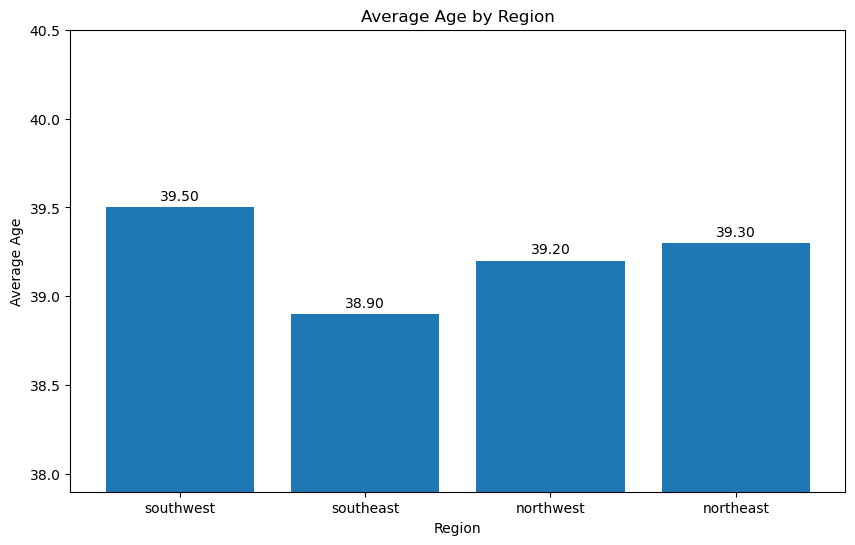

In [18]:
graphData = {
    region: records.get_analyses_national()["age"]["Average Age (" + region + ")"]
    for region in records.regions
}

plt.figure(figsize=(10, 6))
plt.bar(graphData.keys(), graphData.values())
plt.title('Average Age by Region')
plt.xlabel('Region')
plt.ylabel('Average Age')

plt.ylim(min(graphData.values()) - 1, max(graphData.values()) + 1)

for i, txt in enumerate(graphData.values()):
    plt.annotate(f'{txt:.2f}', (list(graphData.keys())[i], list(graphData.values())[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.show()

### Average Costs Per Age Brackets (National)
This graph visualises the average costs of each age bracket.
With the data visualised, it allows the viewer to quickly see trends in the data.
The main trend being that as age increases, so too does cost of an individual's insurance.

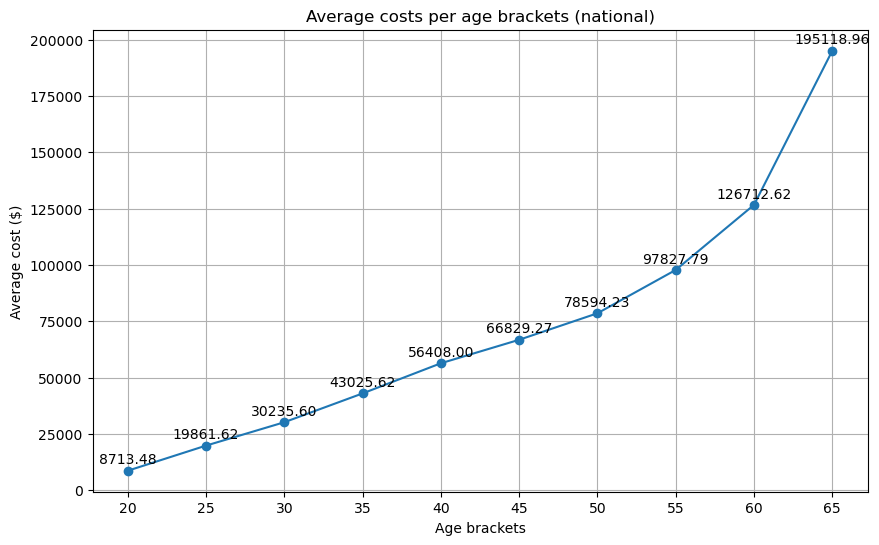

In [19]:
figures = {k: v for k, v in records.get_analyses_national()["age"]['Bracket averages (national)'].items()}
plt.figure(figsize=(10,6))
plt.plot(figures.keys(), figures.values(), marker='o', linestyle='-')
plt.title('Average costs per age brackets (national)')
plt.xlabel('Age brackets')
plt.ylabel('Average cost ($)')
plt.xticks(range(min(figures.keys()), max(figures.keys()) + 1, 5))  # Set x-axis ticks in increments of 5
plt.grid(True)

for i, txt in enumerate(figures.values()):
    plt.annotate(f'{txt:.2f}', (list(figures.keys())[i], list(figures.values())[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.show()

### Average Costs Per Age Brackets (Regional)
As with the previous graph showed the national costs of healthcare, a natural continuation is to do the same for each region.
While this could be done in a separate graph for each region, combining all the regions into the same graph allows for some additional at a glance analysis.

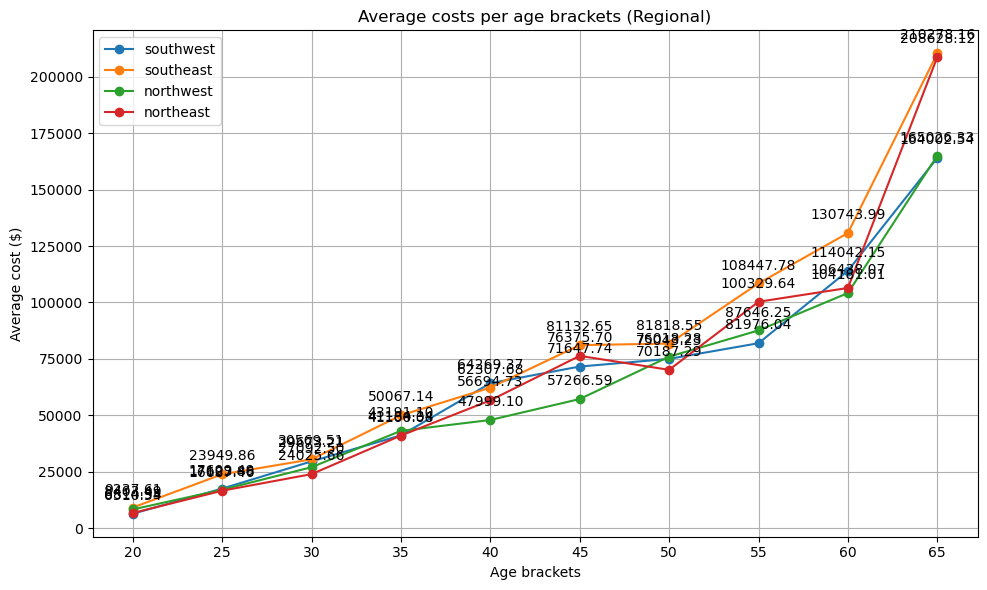

In [20]:
plt.figure(figsize=(10,6))
plt.title('Average costs per age brackets (Regional)')
plt.xlabel('Age brackets')
plt.ylabel('Average cost ($)')

regions = records.regions

for region in regions:
    figures = {k: v for k, v in records.get_analyses_national()["age"]['Bracket averages (' + region + ')'].items()}
    plt.plot(figures.keys(), figures.values(), marker='o', linestyle='-', label=region)
    plt.xticks(range(min(figures.keys()), max(figures.keys()) + 1, 5))  # Set x-axis ticks in increments of 5
    for i, txt in enumerate(figures.values()):
        plt.annotate(f'{txt:.2f}', (list(figures.keys())[i], list(figures.values())[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()